In [17]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.decomposition import NMF
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt 

In [85]:
import pickle
file = open('more_musicals_df_old.pkl','rb')
more_musicals_df_old = pickle.load(file)

In [100]:
file = open('more_musicals_df_real.pkl','rb')
more_musicals_df_real = pickle.load(file)

In [87]:
file = open('all_musical_df_old.pkl','rb')
all_musical_df_old = pickle.load(file)

In [88]:
file = open('all_musical_df_real.pkl','rb')
all_musical_df_real = pickle.load(file)

In [126]:
file = open('just_sondheim.pkl','rb')
just_sondheim = pickle.load(file)

In [111]:
sid = SentimentIntensityAnalyzer()

more_musicals_df_real['ss'] = [sid.polarity_scores(x) for x in more_musicals_df_real['song_lyrics_forPOS']]
sentiment_scores_df = more_musicals_df_real['ss'].apply(pd.Series)
more_musicals_df_real = pd.concat([more_musicals_df_real,sentiment_scores_df], axis = 1)
more_musicals_df_real.drop('ss', axis = 1, inplace = True)

In [123]:
musicals_df_real = pd.concat([more_musicals_df_real,all_musical_df_real], ignore_index = True)

/Users/noramay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [124]:
musicals_df_real

,POS tags,POS_tags,compound,dates,descriptions,neg,neu,num_words,pos,set_tokened_lyrics,song_lyrics,song_lyrics_forPOS,song_lyrics_pro,titles,tokened_lyrics,tokens_forPOS,unique_POS_tags,unique_words
0,"[(Prologue, NNP), ((, (), (spoken, VBN), (), )...","[(Prologue, NNP), ((, (), (spoken, VBN), (), )...",0.9146,1986.0,"""Phantom of the Opera, The"" Synopsis - Broadwa...",0.037,0.884,388,0.079,"{velvet, often, assembled, a, twice, disaster,...",Prologue AUCTIONEER (spok...,Prologue (spoken) Sold....,prologue spoken sold ...,"Phantom of the Opera, The","[sold, number, sir, thank, lot, ladies, poster...","[Prologue, (, spoken, ), Sold, ., Your, number...","{(many, JJ), (attention, NN), (begins, NNS), (...",204
1,"[(Overture/Hannibal, NN), (:, :), (This, DT), ...","[(Overture/Hannibal, NN), (:, :), (This, DT), ...",0.9964,1986.0,"""Phantom of the Opera, The"" Synopsis - Broadwa...",0.041,0.772,393,0.187,"{firmin, parents, greet, a, trust, orphan, chi...",Overture/Hannibal CARLOTTA...,Overture/Hannibal : This...,overture hannibal this...,"Phantom of the Opera, The","[hannibal, trophy, saviours, saviours, enslavi...","[Overture/Hannibal, :, This, trophy, from, our...","{(Monsieur, NN), (dormitory, NN), (Hark, NNP),...",217
2,"[(Think, NN), (of, IN), (Me, NNS), (:, :), (Th...","[(Think, NN), (of, IN), (Me, NNS), (:, :), (Th...",0.8850,1986.0,"""Phantom of the Opera, The"" Synopsis - Broadwa...",0.043,0.859,204,0.098,"{but, her, won, think, a, try, love, thought, ...",Think of Me CHRISTINE: Thi...,Think of Me : Think of me...,think of me think of me...,"Phantom of the Opera, The","[think, think, think, fondly, said, goodbye, r...","[Think, of, Me, :, Think, of, me, ,, think, of...","{(those, DT), (be, VB), (days, NNS), (hard, JJ...",107
3,"[(Angel, NNP), (of, IN), (Music, NNP), (Bravi,...","[(Angel, NNP), (of, IN), (Music, NNP), (Bravi,...",0.9848,1986.0,"""Phantom of the Opera, The"" Synopsis - Broadwa...",0.067,0.767,294,0.166,"{daae, her, frightens, talking, think, a, hand...",Angel of Music PHANTOM Br...,"Angel of Music Bravi, b...",angel of music bravi b...,"Phantom of the Opera, The","[angel, music, bravi, bravi, bravissimi, chris...","[Angel, of, Music, Bravi, ,, bravi, ,, braviss...","{(dreams, NN), (face, NN), (quite, RB), (be, V...",156
4,"[(Little, JJ), (Lotte/The, NNP), (Mirror, NNP)...","[(Little, JJ), (Lotte/The, NNP), (Mirror, NNP)...",0.9784,1986.0,"""Phantom of the Opera, The"" Synopsis - Broadwa...",0.103,0.752,421,0.146,"{master, songs, her, soul, flattering, child, ...",Little Lotte/The Mirror Li...,Little Lotte/The Mirror Li...,little lotte the mirror li...,"Phantom of the Opera, The","[little, lotte, mirror, little, lotte, little,...","[Little, Lotte/The, Mirror, Little, Lotte, Lit...","{(face, NN), (Who, WP), (child, NN), (Master, ...",141
5,"[(The, DT), (Phantom, NNP), (of, IN), (the, DT...","[(The, DT), (Phantom, NNP), (of, IN), (the, DT...",0.5962,1986.0,"""Phantom of the Opera, The"" Synopsis - Broadwa...",0.033,0.903,153,0.065,"{the, do, angel, inside, combined, mind, spiri...",The Phantom of the Opera C...,The Phantom of the Opera ...,the phantom of the opera ...,"Phantom of the Opera, The","[phantom, opera, sleep, sang, dreams, came, vo...","[The, Phantom, of, the, Opera, In, sleep, he, ...","{(My, NNP), (face, NN), (wear, VBP), (Our, PRP...",68
6,"[(Music, NNP), (of, IN), (the, DT), (Night, NN...","[(Music, NNP), (of, IN), (the, DT), (Night, NN...",0.7418,1986.0,"""Phantom of the Opera, The"" Synopsis - Broadwa...",0.085,0.812,227,0.102,"{imagination, soul, slowly, purge, intoxicatio...",Music of the Night Night t...,Music of the Night Night t...,music of the night night t...,"Phantom of the Opera, The","[music, night, night, time, sharpens, heighten...","[Music, of, the, Night, Night, time, sharpens,...","{(face, NN), (be, VB), (imagination, NN), (tho...",121
7,"[(Magical, JJ), (Lasso, NNP), (Like, IN), (yel...","[(Magical, JJ), (Lasso, NNP), (Like, IN), (yel...",0.8829,1986.0,"""Phantom of the Opera, T

In [125]:
musicals_df_real.to_csv('more_musicals_df_real.csv')

In [121]:
all_musical_df_real.to_csv('all_musical_df_real.csv')

In [113]:

all_musical_df_real['ss'] = [sid.polarity_scores(x) for x in all_musical_df_real['song_lyrics_forPOS']]
sentiment_scores_df = all_musical_df_real['ss'].apply(pd.Series)
all_musical_df_real = pd.concat([all_musical_df_real,sentiment_scores_df], axis = 1)
all_musical_df_real.drop('ss', axis = 1, inplace = True)

In [116]:
all_musical_df_real.titles.unique()

array(['Oklahoma', 'Carousel', 'State Fair', 'Allegro', 'South Pacific',
       'King and I, The', 'Me and Juliet',
       'Cinderella: Songs from the Classic Fairy Tale',
       'Flower Drum Song', 'Sound of Music, The', 'Show Boat',
       'Funny Thing Happened On The Way To The Forum, A',
       'Little Night Music', 'Anyone Can Whistle', 'Assassins', 'Company',
       'Do I Hear A Waltz?', 'Follies', 'Gypsy', 'Into the Woods',
       'Pacific Overtures', 'Passion', 'Sunday in the Park With George',
       'Sweeney Todd: The Demon Barber of Fleet Street', 'Frogs, The',
       'West Side Story', 'Hamilton', 'In the Heights'], dtype=object)

In [128]:
just_sondheim['ss'] = [sid.polarity_scores(x) for x in just_sondheim['song_lyrics_forPOS']]
sentiment_scores_df = just_sondheim['ss'].apply(pd.Series)
just_sondheim = pd.concat([just_sondheim,sentiment_scores_df], axis = 1)
just_sondheim.drop('ss', axis = 1, inplace = True)

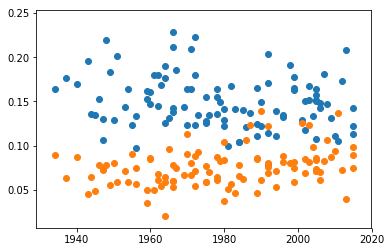

In [119]:
#plot of year vs average sentiment per musical
plt.scatter(more_musicals_df_real.groupby('titles').dates.median(), more_musicals_df_real.groupby('titles').pos.mean())
plt.scatter(more_musicals_df_real.groupby('titles').dates.median(), more_musicals_df_real.groupby('titles').neg.mean())

#in general more positive than negative, and overall trend is more neg/less pos as time goes on. 
#max pos in 1960s, max neg in 1990s, other high positives between '50 and 70, other high negatives in 90s-10s

In [137]:
just_sondheim.drop('index', axis = 1, inplace = True)

In [139]:
just_sondheim.to_csv('just_sondheim.csv')

In [50]:
phantomdf = more_musicals_df_real[more_musicals_df_real['titles'] == 'Phantom of the Opera, The']

In [174]:
def plot_sentiment(title, date):
    df = more_musicals_df_real[more_musicals_df_real['titles'] == title]
    plt.plot(df.pos,'b')
    plt.plot(df.neg, 'r')
    plt.title(title+ ' ' +date,fontsize=15)
    plt.xticks([])
    plt.tight_layout()

In [151]:
more_musicals_df_real[['titles','dates']].sort_values('dates')



,titles,dates
2039,Anything Goes,1934.0
2042,Anything Goes,1934.0
2038,Anything Goes,1934.0
2036,Anything Goes,1934.0
2035,Anything Goes,1934.0
2034,Anything Goes,1934.0
2033,Anything Goes,1934.0
2032,Anything Goes,1934.0
2031,Anything Goes,1934.0
2030,Anything Goes,1934.0


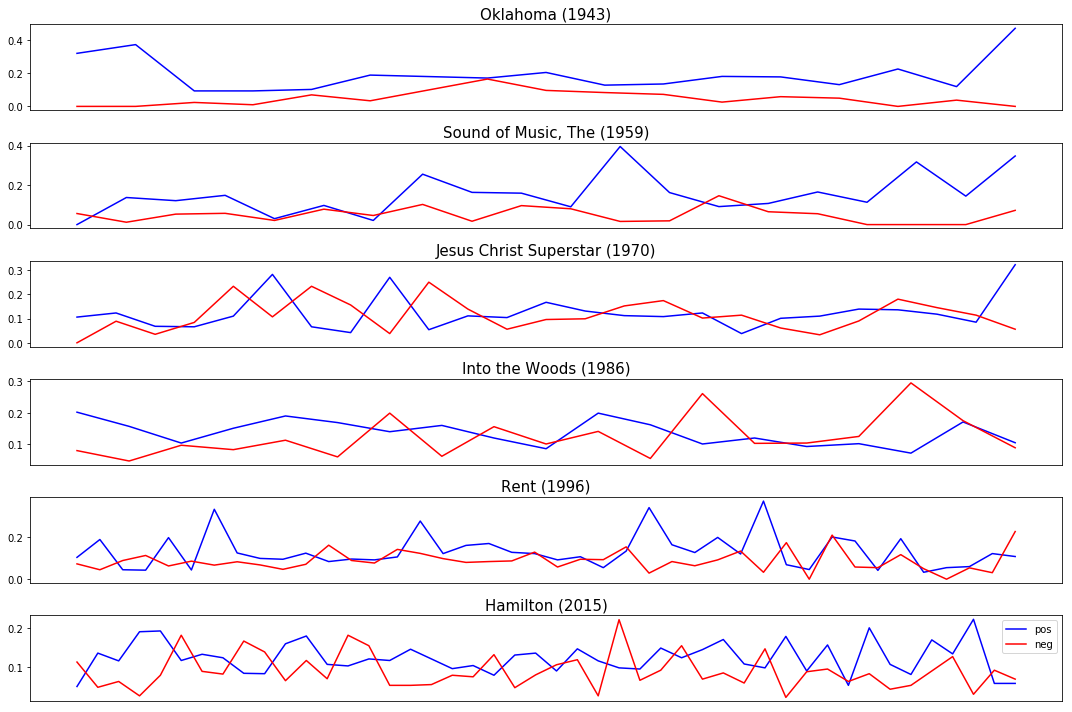

In [178]:
plt.figure(figsize=(15,10))
plt.subplot(6,1,1)
plot_sentiment('Oklahoma','(1943)')
plt.subplot(6,1,2)
plot_sentiment('Sound of Music, The','(1959)')
plt.subplot(6,1,3)
plot_sentiment('Jesus Christ Superstar','(1970)')
plt.subplot(6,1,4)
plot_sentiment('Into the Woods','(1986)')
plt.subplot(6,1,5)
plot_sentiment('Rent','(1996)')
plt.subplot(6,1,6)
plot_sentiment('Hamilton','(2015)')
plt.legend()
#hamilton ends on a sad note, where as oklahoma is always more happy than sad. 

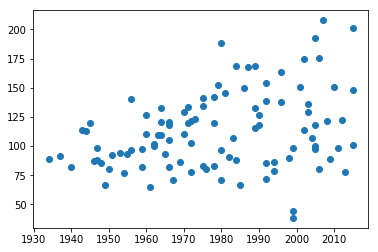

In [53]:
#plot of year vs average unique words per song
plt.scatter(more_musicals_df_old.groupby('titles').dates.median(), more_musicals_df_old.groupby('titles').unique_words.mean())

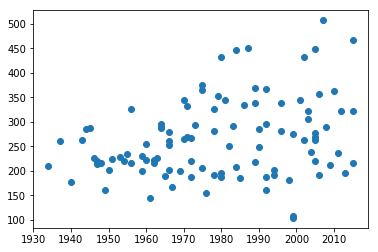

In [54]:
#plot of year vs total words per song
plt.scatter(more_musicals_df_old.groupby('titles').dates.median(), more_musicals_df_old.groupby('titles').num_words.mean())

In [83]:
more_musicals_df_real

,index,titles,descriptions,song_lyrics,song_lyrics_pro,tokened_lyrics,set_tokened_lyrics,unique_words,dates,song_lyrics_forPOS,tokens_forPOS,POS tags,POS_tags,unique_POS_tags,ss,neg,neu,pos,compound,num_words
0,0,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Prologue AUCTIONEER (spok...,prologue spoken sold ...,"[prologue, spoken, sold, your, number, sir, th...","{velvet, often, assembled, disaster, twice, a,...",204,1986.0,Prologue (spoken) Sold....,"[Prologue, (, spoken, ), Sold, ., Your, number...","[(Prologue, NNP), ((, (), (spoken, VBN), (), )...","[(Prologue, NNP), ((, (), (spoken, VBN), (), )...","{(many, JJ), (attention, NN), (begins, NNS), (...","{'neg': 0.037, 'neu': 0.884, 'pos': 0.079, 'co...",0.037,0.884,0.079,0.9146,388
1,1,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Overture/Hannibal CARLOTTA...,overture hannibal this...,"[overture, hannibal, this, trophy, from, our, ...","{firmin, parents, trust, a, greet, orphan, chi...",217,1986.0,Overture/Hannibal : This...,"[Overture/Hannibal, :, This, trophy, from, our...","[(Overture/Hannibal, NN), (:, :), (This, DT), ...","[(Overture/Hannibal, NN), (:, :), (This, DT), ...","{(Monsieur, NN), (dormitory, NN), (Hark, NNP),...","{'neg': 0.041, 'neu': 0.772, 'pos': 0.187, 'co...",0.041,0.772,0.187,0.9964,393
2,2,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Think of Me CHRISTINE: Thi...,think of me think of me...,"[think, of, me, think, of, me, think, of, me, ...","{but, her, won, think, a, try, please, thought...",107,1986.0,Think of Me : Think of me...,"[Think, of, Me, :, Think, of, me, ,, think, of...","[(Think, NN), (of, IN), (Me, NNS), (:, :), (Th...","[(Think, NN), (of, IN), (Me, NNS), (:, :), (Th...","{(those, DT), (be, VB), (days, NNS), (hard, JJ...","{'neg': 0.043, 'neu': 0.859, 'pos': 0.098, 'co...",0.043,0.859,0.098,0.8850,204
3,3,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Angel of Music PHANTOM Br...,angel of music bravi b...,"[angel, of, music, bravi, bravi, bravissimi, c...","{daae, her, frightens, talking, think, a, hand...",156,1986.0,"Angel of Music Bravi, b...","[Angel, of, Music, Bravi, ,, bravi, ,, braviss...","[(Angel, NNP), (of, IN), (Music, NNP), (Bravi,...","[(Angel, NNP), (of, IN), (Music, NNP), (Bravi,...","{(dreams, NN), (face, NN), (quite, RB), (be, V...","{'neg': 0.067, 'neu': 0.767, 'pos': 0.166, 'co...",0.067,0.767,0.166,0.9848,294
4,4,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Little Lotte/The Mirror Li...,little lotte the mirror li...,"[little, lotte, the, mirror, little, lotte, li...","{master, songs, her, soul, flattering, child, ...",141,1986.0,Little Lotte/The Mirror Li...,"[Little, Lotte/The, Mirror, Little, Lotte, Lit...","[(Little, JJ), (Lotte/The, NNP), (Mirror, NNP)...","[(Little, JJ), (Lotte/The, NNP), (Mirror, NNP)...","{(face, NN), (Who, WP), (child, NN), (Master, ...","{'neg': 0.103, 'neu': 0.752, 'pos': 0.146, 'co...",0.103,0.752,0.146,0.9784,421
5,5,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",The Phantom of the Opera C...,the phantom of the opera ...,"[the, phantom, of, the, opera, in, sleep, he, ...","{the, do, angel, turn, one, inside, spirit, mi...",68,1986.0,The Phantom of the Opera ...,"[The, Phantom, of, the, Opera, In, sleep, he, ...","[(The, DT), (Phantom, NNP), (of, IN), (the, DT...","[(The, DT), (Phantom, NNP), (of, IN), (the, DT...","{(My, NNP), (face, NN), (wear, VBP), (Our, PRP...","{'neg': 0.033, 'neu': 0.903, 'pos': 0.065, 'co...",0.033,0.903,0.065,0.5962,153
6,6,"Phantom of the Opera, The","""Phantom of the Opera, The"" Synopsis - Broadwa...",Music of the Night Night t...,music of the night night t...,"[music, of, the, night, night, time, sharpens,...","{imagination, soul, slowly, purge, trust, into...",121,1986.0,Music of the Night Night t...,"[Music, of, the, Night, Night, time, sharpens,.

In [84]:
all_musical_df_real

NameError: name 'all_musical_df_real' is not defined

In [141]:
just_sondheim.to_pickle('just_sondheim.pkl')